In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
df = pd.read_csv('PricingData_top_2_markets.csv')
df.head()

,market_group,car_group,pickup_date,pickup_dow,lor_group,pricing_segment,channel_group,last_update,advance_day,avis_price,budget_price,payless_price,hertz_price,dollar_price,thrifty_price,enterprise_price,national_price,alamo_price,rate
0,LAX,D,2017-02-22 00:00:00,3,LOR:1-4,ASSOCIATION BASE,GDS GRP,2017-02-22 10:22:25,0,55.0,52.0,31.0,55.0,53.0,38.0,56.0,75.0,53.0,daily
1,LAX,A,2017-02-22 00:00:00,3,LOR:1-4,ASSOCIATION BASE,GDS GRP,2017-02-22 10:22:25,0,53.0,53.0,35.0,52.0,50.0,36.0,59.0,73.0,56.0,daily
2,LAX,B,2017-02-22 00:00:00,3,LOR:1-4,ASSOCIATION BASE,GDS GRP,2017-02-22 10:22:25,0,52.0,50.0,36.0,53.0,51.0,36.0,54.0,73.0,51.0,daily
3,LAX,C,2017-02-22 00:00:00,3,LOR:1-4,ASSOCIATION BASE,GDS GRP,2017-02-22 10:22:25,0,53.0,51.0,37.0,54.0,52.0,37.0,55.0,74.0,52.0,daily
4,LAX,E,2017-02-22 00:00:00,3,LOR:1-4,ASSOCIATION BASE,GDS GRP,2017-02-22 10:22:25,0,56.0,53.0,32.0,56.0,54.0,40.0,57.0,76.0,54.0,daily


In [23]:
df.columns

Index(['market_group', 'car_group', 'pickup_date', 'pickup_dow', 'lor_group',
       'pricing_segment', 'channel_group', 'last_update', 'advance_day',
       'avis_price', 'budget_price', 'payless_price', 'hertz_price',
       'dollar_price', 'thrifty_price', 'enterprise_price', 'national_price',
       'alamo_price', 'rate'],
      dtype='object')

In [24]:
len(df)

2145388

In [25]:
def get_df_by_brand(df, brand):
    brand_colname = brand + '_price'
    comp_colnames = []
    if brand_colname == 'avis_price':
        comp_colnames = ['hertz_price', 'national_price']
    elif brand_colname == 'budget_price':
        comp_colnames = ['alamo_price', 'enterprise_price']
    elif brand_colname == 'payless_price':
        comp_colnames = ['dollar_price', 'thrifty_price']
    df_brand = df[[brand_colname] + comp_colnames]
    df_brand = df_brand[np.isfinite(df_brand[brand_colname])]
    return df_brand

In [26]:
df_avis = get_df_by_brand(df, 'avis')
df_avis.head(10)

,avis_price,hertz_price,national_price
0,55.0,55.0,75.0
1,53.0,52.0,73.0
2,52.0,53.0,73.0
3,53.0,54.0,74.0
4,56.0,56.0,76.0
5,69.0,72.0,100.0
6,54.0,NaN,NaN
7,86.0,NaN,95.0
8,70.0,57.0,82.0
9,84.0,77.0,122.0


In [27]:
len(df_avis)

1948519

In [28]:
fill_series = df_avis.max(axis=1, skipna=True)
for col in df_avis.columns:
    df_avis[col] = df_avis[col].fillna(fill_series)
df_avis.head(10)

,avis_price,hertz_price,national_price
0,55.0,55.0,75.0
1,53.0,52.0,73.0
2,52.0,53.0,73.0
3,53.0,54.0,74.0
4,56.0,56.0,76.0
5,69.0,72.0,100.0
6,54.0,54.0,54.0
7,86.0,95.0,95.0
8,70.0,57.0,82.0
9,84.0,77.0,122.0


In [29]:
df_avis['percent_under'] = df_avis.iloc[:, 1:].min(axis=1) - df_avis.iloc[:, 0]
df_avis

,avis_price,hertz_price,national_price,percent_under
0,55.0,55.00,75.0,0.00
1,53.0,52.00,73.0,-1.00
2,52.0,53.00,73.0,1.00
3,53.0,54.00,74.0,1.00
4,56.0,56.00,76.0,0.00
5,69.0,72.00,100.0,3.00
6,54.0,54.00,54.0,0.00
7,86.0,95.00,95.0,9.00
8,70.0,57.00,82.0,-13.00
9,84.0,77.00,122.0,-7.00


In [31]:
df_avis['percent_under'] /= df_avis.iloc[:, :2].min(axis=1)
df_avis

,avis_price,hertz_price,national_price,percent_under
0,55.0,55.00,75.0,0.000000
1,53.0,52.00,73.0,-0.019231
2,52.0,53.00,73.0,0.019231
3,53.0,54.00,74.0,0.018868
4,56.0,56.00,76.0,0.000000
5,69.0,72.00,100.0,0.043478
6,54.0,54.00,54.0,0.000000
7,86.0,95.00,95.0,0.104651
8,70.0,57.00,82.0,-0.228070
9,84.0,77.00,122.0,-0.090909


In [36]:
def get_percent_pivot_table(df_brand, df_full, index, columns):
    df_brand = df_brand.join(df_full[[index, columns]])
    table = pd.pivot_table(df_brand, values='percent_under', index=index, columns=columns, aggfunc=np.mean)
    return table

In [37]:
def get_count_pivot_table(df_brand, df_full, index, columns):
    df_brand = df_brand.join(df_full[[index, columns]])
    table = pd.pivot_table(df_brand, values='percent_under', index=index, columns=columns, aggfunc='count')
    return table

In [41]:
table = get_percent_pivot_table(df_avis, df, 'pricing_segment', 'market_group')
table

market_group,LAX,SFO
pricing_segment,,
ASSOC - AARP,-0.052829,-0.116499
ASSOCIATION BASE,-0.005967,-0.135167
ASSOCIATION STEALTH,-0.008753,-0.118625
GOVERNMENT - DEFINED/SATO,0.071066,0.017365
GOVERNMENT BASE,0.059942,-0.003970
INBOUND US FROM CA,0.008314,0.006574
INTRA-CITY 1,-0.000065,-0.080904
INTRA-CITY 2,0.020040,-0.057120
INTRA-CITY 3,0.146749,-0.045796


In [42]:
table2 = get_count_pivot_table(df_avis, df, 'market_group', 'pricing_segment')
table2

pricing_segment,ASSOC - AARP,ASSOCIATION BASE,ASSOCIATION STEALTH,GOVERNMENT - DEFINED/SATO,GOVERNMENT BASE,INBOUND US FROM CA,INTRA-CITY 1,INTRA-CITY 2,INTRA-CITY 3,INTRA-CITY 4,OPAQUE - PRICELINE,PREPAID BASE,RETAIL BASE,RETAIL STEALTH 1,RETAIL STEALTH 2,RETAIL STEALTH 3
market_group,,,,,,,,,,,,,,,,
LAX,70632,108230,82991,22357,36883,6704,14674,14448,14522,12195,99107,83999,285294,79900,69859,55958
SFO,59820,88080,69401,17990,28998,6180,10016,11237,11670,11616,89180,71099,241077,66492,59993,47917


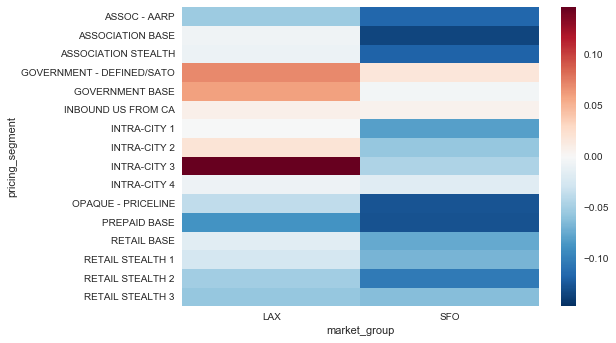

In [43]:
sns.heatmap(table)